In [20]:
import numpy as np
import scipy.constants as scc
from matplotlib import pyplot as plt

In [21]:
def cap_calc(R, f, A):
  w = 2 * np.pi * f
  C = np.sqrt(A**2/(w**2*R**2*(1-A**2)))
  return C

In [22]:
def analyze_resistor(R_value, freq_array, amp_array, cap_fn, **cap_kwargs):
    """Analyzes data for a given resistor using a specified capacitance function."""
    R_label = f"{R_value // scc.mega}M"
    print(f"\nResults for {R_label} resistor:")
    print(f"{'f (kHz)':>10}  {'A':>6}  {'C (pF)':>10}")
    print("-" * 30)

    A = amp_array   

    # Call cap_fn with optional arguments
    C = cap_fn(R_value, freq_array, A, **cap_kwargs)

    for f, A_val, C_val in zip(freq_array, A, C):
        print(f"{f/scc.kilo:10.2f}  {A_val:6.3f}  {C_val/scc.pico:10.2f}")

# More readable dictionary-based data structure
resistor_data = [
    {
        "R": 0.1 * scc.mega,
        "frequencies": [1000,2000,4000,5000,10000,20000],
        "amplitudes":  np.array([.0152,.0213,.0929,.0453,.150,.118])/4.99
    }
]

# Use the default cap_calc
for entry in resistor_data:
    freqs = np.array(entry["frequencies"])
    amps  = np.array(entry["amplitudes"])
    analyze_resistor(entry["R"], freqs, amps, cap_calc)

# To try cap_calc_2, define Cs and Rs and pass them as keyword arguments
# Example usage:
# analyze_resistor(entry["R"], freqs, amps, cap_calc_2, Cs=10e-12, Rs=10e3)



Results for 0.0M resistor:
   f (kHz)       A      C (pF)
------------------------------
      1.00   0.003        4.85
      2.00   0.004        3.40
      4.00   0.019        7.41
      5.00   0.009        2.89
     10.00   0.030        4.79
     20.00   0.024        1.88


In [23]:
# now write as python function
import numpy as np
import scipy.constants as scc

def cap_calc_2(R,f,A,Cs,Rs):
    w = 2*np.pi*f
    Xs = -1j/w/Cs
    zp = 1/(1/R+ 1/Rs + 1/Xs)
    r = zp.real
    x = zp.imag
    a = w**2*(r**2 + x**2)*(A**2-1)
    b = b = -2 * A **2* w * x
    c = A**2
    C = (-b - np.sqrt(b**2 - 4*a*c)) / (2*a)
    return C


Cs = 1*scc.pico
Rs = 10*scc.mega

To do list:


*   Modify the cell above to include the data for the 4M resistor
* Add in the data from the empty capacitor that you already took
* Write some notes to yourself (or maybe as a text cell in this notebook).  What can you conclude from this analysis.
*   Write a new function that includes the resistance and capacitance of the scope probe in the formula for C.  (I already sent you the formula for this in an earlier email)
* Repeat the analysis
* Final note, write a discussion about how to interpret this.  
-- Is this method reliably giving us the capacitance as a function of frequency?  
-- Do we trust this enough to get epsilon(w) values?
-- Do we maybe only trust it over a range of frequencies.
-- Does anything about the data and calculations indicate which resistor value 1M, 2M, or 4M is most reliable?






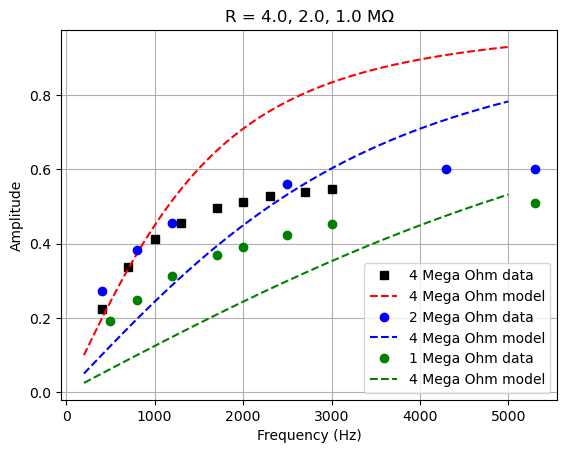

In [24]:

# Set up the frequency range using numpy's linspace function
# It creates 1000 evenly spaced values from 500 to 5000 Hz
f_start = 200       # starting frequency in Hz
f_end = 5000        # ending frequency in Hz
npts = 1000         # number of points
f1 = np.linspace(f_start, f_end, npts)  # frequency array
f2 = np.array([400, 700, 1000, 1300, 1700, 2000, 2300, 2700, 3000])
V2 = np.array([0.448, 0.672, 0.824, 0.912, 0.992, 1.024, 1.056, 1.08, 1.096])/2
f3 = np.array([400, 800, 1200, 2500, 4300, 5300])
V3 = np.array([0.544, 0.768, 0.912, 1.12, 1.2, 1.2])/2
f4 = np.array([500, 800, 1200, 1700, 2000, 2500, 3000, 5300])
V4 = np.array([0.384, 0.496, 0.624, 0.736, 0.784, 0.848, 0.904, 1.016])/2

# Define the circuit component values
R2 = 4 * scc.mega      # resistance = 1 megaohm
R3 = 2 * scc.mega
R4 = 1 * scc.mega
C = 20 * scc.pico     # capacitance = 10 picofarads

# Define a function to calculate the amplitude across the resistor
def amplitude1(f1, C, R2):
 #   '''
 #   Calculates the amplitude of the voltage across a resistor in an RC circuit.

 #   Parameters:
  #  f : frequency in Hz
 #   C : capacitance in farads
  #  R : resistance in ohms

 #   Returns:
 #   Amplitude as a function of frequency
  #  '''
  w = 2 * np.pi * f1        # Convert frequency to angular frequency
  Xc = 1 / (1j * w * C)    # Capacitive reactance (imaginary)
  A1 = np.abs(R2 / (R2 + Xc)) # Voltage divider formula for amplitude
  return A1

def amplitude2(f1, C, R3):
  w = 2 * np.pi * f1        # Convert frequency to angular frequency
  Xc = 1 / (1j * w * C)    # Capacitive reactance (imaginary)
  A2 = np.abs(R3 / (R3 + Xc)) # Voltage divider formula for amplitude
  return A2

def amplitude3(f1, C, R4):
  w = 2 * np.pi * f1        # Convert frequency to angular frequency
  Xc = 1 / (1j * w * C)    # Capacitive reactance (imaginary)
  A3 = np.abs(R4 / (R4 + Xc)) # Voltage divider formula for amplitude
  return A3

# Plot the result
plt.plot(f2, V2,'ks',label='4 Mega Ohm data')
#R2 = 5*scc.mega
plt.plot(f1,amplitude1(f1,C,R2),'--r',label='4 Mega Ohm model')

plt.plot(f3, V3,'bo',label='2 Mega Ohm data')
plt.plot(f1,amplitude1(f1,C,R3),'--b',label='4 Mega Ohm model')

plt.plot(f4, V4,'go',label='1 Mega Ohm data')
plt.plot(f1,amplitude1(f1,C,R4),'--g',label='4 Mega Ohm model')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title(f'R = {R2/scc.mega:.1f}, {R3/scc.mega:.1f}, {R4/scc.mega:.1f} MΩ')
plt.grid(True)
plt.legend()
plt.show()


In [26]:
d2 = 0.63*scc.milli 
r = 1*scc.inch
A2 = np.pi*r**2
C2 = scc.epsilon_0*A2/d2 
print(f'C2 = {C2/scc.pico:.2f} pF')

C2 = 28.49 pF


In [27]:
273-240

33